In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [22]:
# Load the dataset
data = pd.read_csv('/Users/JAWAD/Videos/MLintern/heart.csv')

# Display basic information about the dataset
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      1

C:\Users\JAWAD\AppData\Local\Temp\ipykernel_17848\3704162711.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=data, palette='viridis')


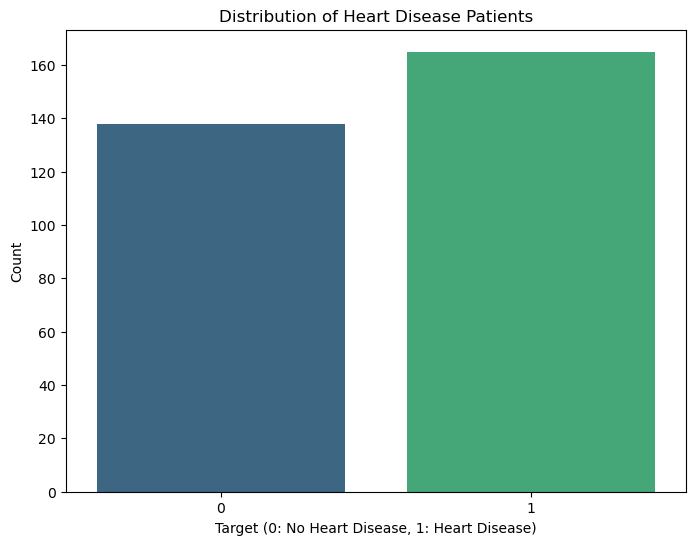

In [23]:
# Display a summary of people who have heart disease (target = 1)
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=data, palette='viridis')
plt.title('Distribution of Heart Disease Patients')
plt.xlabel('Target (0: No Heart Disease, 1: Heart Disease)')
plt.ylabel('Count')
plt.show()

# Fill missing values or drop rows/columns with missing values
data = data.dropna()  # Or you can use data.fillna(method='ffill') or any other strategy

# Encode categorical features
data = pd.get_dummies(data, drop_first=True)

# Separate features and target variable
X = data.drop('target', axis=1)  # Replace 'target' with the actual name of your target column
y = data['target']

# Encode the target labels if necessary
le = LabelEncoder()
y = le.fit_transform(y)


In [24]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [25]:
# Build the model
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(np.max(y_train) + 1, activation='softmax')  # Output layer adjusted based on number of unique classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


c:\Users\JAWAD\anaconda3\envs\Jupyter\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=2)


Epoch 1/50
8/8 - 1s - 127ms/step - accuracy: 0.5041 - loss: 0.7699 - val_accuracy: 0.7541 - val_loss: 0.5920
Epoch 2/50
8/8 - 0s - 6ms/step - accuracy: 0.5661 - loss: 0.7041 - val_accuracy: 0.8689 - val_loss: 0.4935
Epoch 3/50
8/8 - 0s - 6ms/step - accuracy: 0.6983 - loss: 0.5672 - val_accuracy: 0.8689 - val_loss: 0.4315
Epoch 4/50
8/8 - 0s - 6ms/step - accuracy: 0.7727 - loss: 0.5148 - val_accuracy: 0.8852 - val_loss: 0.3921
Epoch 5/50
8/8 - 0s - 6ms/step - accuracy: 0.7355 - loss: 0.5105 - val_accuracy: 0.8852 - val_loss: 0.3625
Epoch 6/50
8/8 - 0s - 8ms/step - accuracy: 0.7314 - loss: 0.4917 - val_accuracy: 0.8852 - val_loss: 0.3473
Epoch 7/50
8/8 - 0s - 6ms/step - accuracy: 0.8017 - loss: 0.4356 - val_accuracy: 0.8852 - val_loss: 0.3368
Epoch 8/50
8/8 - 0s - 8ms/step - accuracy: 0.8182 - loss: 0.4343 - val_accuracy: 0.8852 - val_loss: 0.3300
Epoch 9/50
8/8 - 0s - 6ms/step - accuracy: 0.7851 - loss: 0.4376 - val_accuracy: 0.8852 - val_loss: 0.3244
Epoch 10/50
8/8 - 0s - 6ms/step - a

In [27]:
# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.4455930292606354
Test accuracy: 0.868852436542511


In [28]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test  # Assuming y_test is already integer-encoded

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_true, y_pred_classes))

# Convert le.classes_ to list of strings for classification_report
target_names = list(map(str, le.classes_))
print(classification_report(y_true, y_pred_classes, target_names=target_names))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Accuracy: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



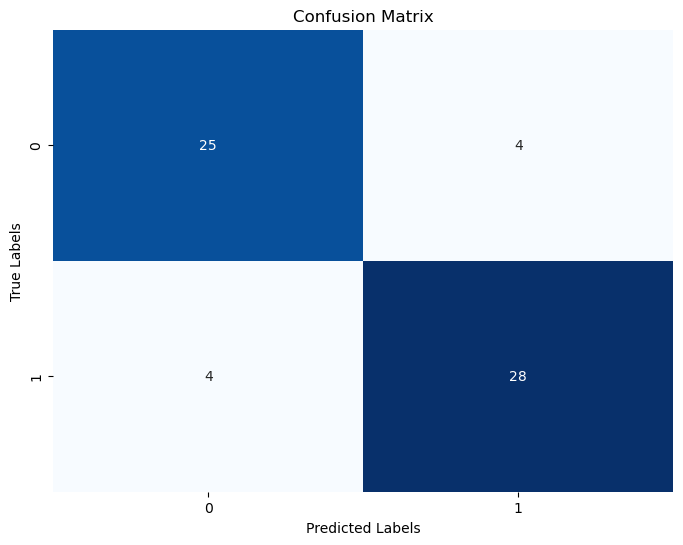

In [29]:
# Visualize prediction results (example: confusion matrix)
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
